<div class="alert alert-block alert-info">
            <b> BRIEF REPORT FOR DATABASES-TOPIC. <b>
<div>

> Student: Ana María del Cacho Tena

Context:

This document contains a brief report on a database called "movies_2". The "pymongo" library will be used to work from Jupyter Notebooks and Python with MongoDB commands. From here, we will generate statistical analysis complementary to the graphs used in Mongo Atlas chart.

Enjoy the work!

In [ ]:
# !pip install pymongo

In [2]:
from pymongo import MongoClient
import pandas as pd

**pymongo** is the package that provides Python MongoDB drivers for connecting and interacting with a MongoDB database. Additionally, the *MongoClient class* is used to establish a connection to a MongoDB server.

**pandas**, meanwhile, is the package that provides powerful data manipulation and analysis tools. We will used it in the following cell to open the CSV file.

In [3]:
## To open the database in cvs format with pandas

header="Film,Genre,Lead_Studio,Audience_Score,Profitability,Rotten_Tomatoes,Worldwide_Gross,Year\n"

with open("movies_2.csv", "w", encoding="utf-8") as file:
    file.write(header)
file.close()

In [4]:
import pandas as pd

df = pd.read_csv('movies/movies_2.csv')

In [5]:
## To convert the DataFrame to a list of dictionaries to facilitate the insertion in MongoDB.

data = df.to_dict(orient='records')

The method "*to_dict*" is a panda's function to convert a DataFrame (*df*) into a dictionary representation. In order to convert each row of the *df* into a dictionay, we used the parameter "*records*" .

In [7]:
## To establish a connection to the MongoDB database

client = MongoClient('localhost', 27017)
db = client['report']
collection = db['movies3']

After converting the "df" into a list of dctionaries, we wrote "*client = MongoClient('localhost', 27017)*" to create an instance and conncet it to a MongoDB server running on the local machine.

Then, we used the line-code "*db = client['report']*" in order to select the database from the MongoDB server.

Finally, we specified a collection (*collection = db['movies3']*) to work with.

In [8]:
## Insert data in a MongoDB collection

collection.insert_many(data)

## Exploratory Data Analysis

In [9]:
# Total number of rows and columns
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# Types of data in each column
print(df.dtypes)

# Statistic Summary of numeric columns
print(df.describe())

# Unique values in an specific column (Genre)
unique_genres = df['Genre'].unique()
print(unique_genres)

Number of rows: 77
Number of columns: 8
Film                  object
Genre                 object
Lead Studio           object
Audience score %       int64
Profitability        float64
Rotten Tomatoes %      int64
Worldwide Gross       object
Year                   int64
dtype: object
       Audience score %  Profitability  Rotten Tomatoes %         Year
count         77.000000      77.000000          77.000000    77.000000
mean          63.727273       4.599483          46.701299  2009.077922
std           13.657113       8.031990          26.095001     1.354974
min           35.000000       0.000000           3.000000  2007.000000
25%           52.000000       1.751351          26.000000  2008.000000
50%           64.000000       2.642353          45.000000  2009.000000
75%           76.000000       5.103117          64.000000  2010.000000
max           89.000000      66.934000          96.000000  2011.000000
['Romance' 'Comedy' 'Drama' 'Animation' 'Fantasy' 'Romence' 'Comdy'
 'Actio

### Operations with "pymongo"

In this section we will not detail each function, as they are described in the delivered PDF of the individual project. 

What we are going to see next, is a brief report of operations with **pymongo** to filter and treat data of our CSV (movies_2), following some concrete orders.

In [10]:
## Obtaining a list with all the movies

movies = collection.find()
for movie in movies:
    print(movie['Film'])

Zack and Miri Make a Porno
Youth in Revolt
You Will Meet a Tall Dark Stranger
When in Rome
What Happens in Vegas
Water For Elephants
WALL-E
Waitress
Waiting For Forever
Valentine's Day
Tyler Perry's Why Did I get Married
Twilight: Breaking Dawn
Twilight
The Ugly Truth
The Twilight Saga: New Moon
The Time Traveler's Wife
The Proposal
The Invention of Lying
The Heartbreak Kid
The Duchess
The Curious Case of Benjamin Button
The Back-up Plan
Tangled
Something Borrowed
She's Out of My League
Sex and the City Two
Sex and the City 2
Sex and the City
Remember Me
Rachel Getting Married
Penelope
P.S. I Love You
Over Her Dead Body
Our Family Wedding
One Day
Not Easily Broken
No Reservations
Nick and Norah's Infinite Playlist
New Year's Eve
My Week with Marilyn
Music and Lyrics
Monte Carlo
Miss Pettigrew Lives for a Day
Midnight in Paris
Marley and Me
Mamma Mia!
Mamma Mia!
Made of Honor
Love Happens
Love & Other Drugs
Life as We Know It
License to Wed
Letters to Juliet
Leap Year
Knocked Up
Killers

In [13]:
## Filtering the movies by genre "Action"

action_movies = collection.find({'Genre': 'Action'})
for movie in action_movies:
    print(movie['Film'])

Killers


In [14]:
## Filtering the movies by genre "Romance"

romance_movies = collection.find({'Genre': 'Romance'})
for movie in romance_movies:
    print(movie['Film'])

Zack and Miri Make a Porno
Waitress
Waiting For Forever
Tyler Perry's Why Did I get Married
Twilight: Breaking Dawn
Twilight
Something Borrowed
P.S. I Love You
One Day
New Year's Eve
Music and Lyrics
Monte Carlo
Jane Eyre


In [15]:
## Find movies with an audience rating above 80%

high_score_movies = collection.find({'Audience score %': {'$gt': 80}})
for movie in high_score_movies:
    print(movie['Film'])

WALL-E
Twilight
The Curious Case of Benjamin Button
Tangled
Sex and the City
P.S. I Love You
My Week with Marilyn
Midnight in Paris
Knocked Up
Across the Universe
A Dangerous Method
(500) Days of Summer


In [18]:
# To calculate the mean of the Audience Score
average_audience_score = df['Audience score %'].mean()
rounded_average_audience_score = round(average_audience_score, 2)
print(f"Average audience score: {rounded_average_audience_score}")

Average audience score: 63.73


In [21]:
# Calculate total profit
total_profit = df['Profitability'].sum()
rounded_total_profit = round(total_profit, 2)
print(f"Total profitability: {rounded_total_profit}")

Total profitability: 354.16


In [23]:
# Calculate the film count per year
movies_per_year = df['Year'].value_counts().sort_index()
print(movies_per_year)

2007    11
2008    20
2009    12
2010    20
2011    14
Name: Year, dtype: int64


## VISUALIZATIONS (Mongo Atlas - chart)

### Analysis of the profitability of different genres.

Analyzing the genre of films allows you:
1. To better understand audience preferences and explore the relationship by genre.
2. To analyze the profitability of different genres and see if there is any correlation between audience reception and profitability.

#### Audience preferences and exploring the relationship by genre.

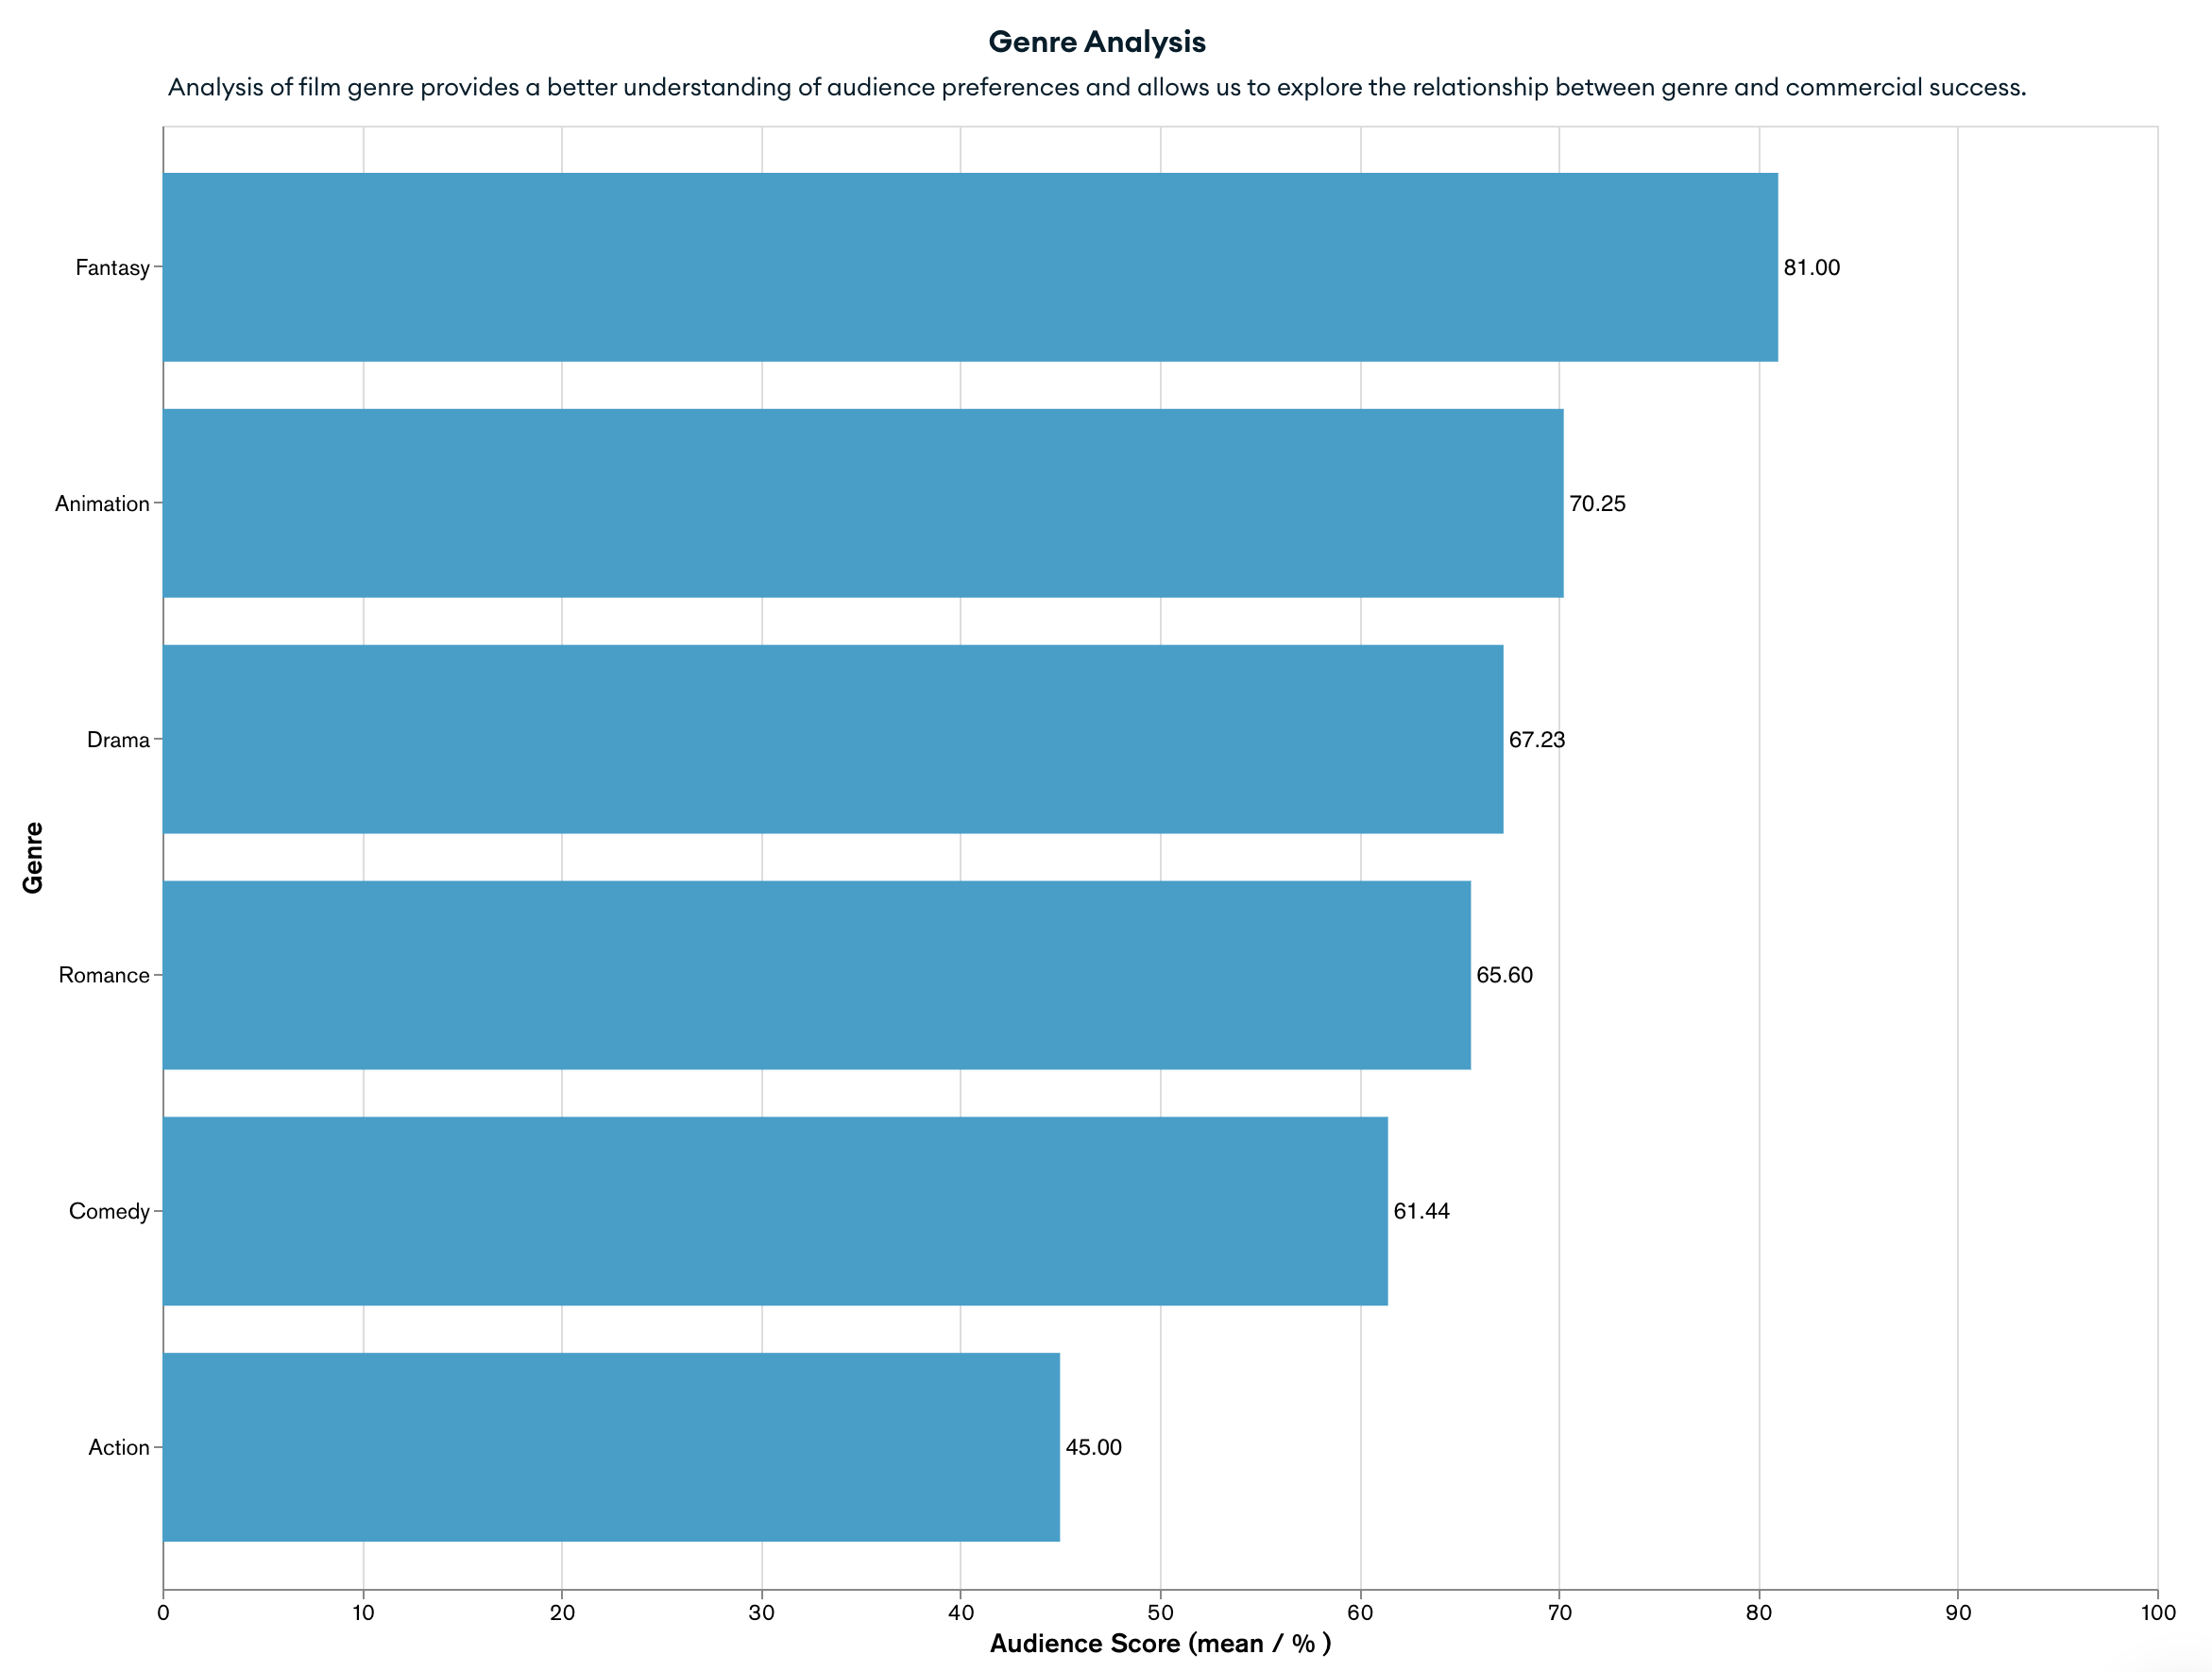

**Conclusions:**

Based on the data in our database records, it is evident that there is a clear preference among the audience for Fantasy and Animation films.

That can be used to inform decision-making processes related to film selection, marketing strategies, and content creation. Understanding and leveraging this preference for Fantasy and Animation films can help cater to the audience's interests, enhance the film-watching experience, and potentially drive higher engagement and success in the film industry.

#### To analyze the profitability of different genres

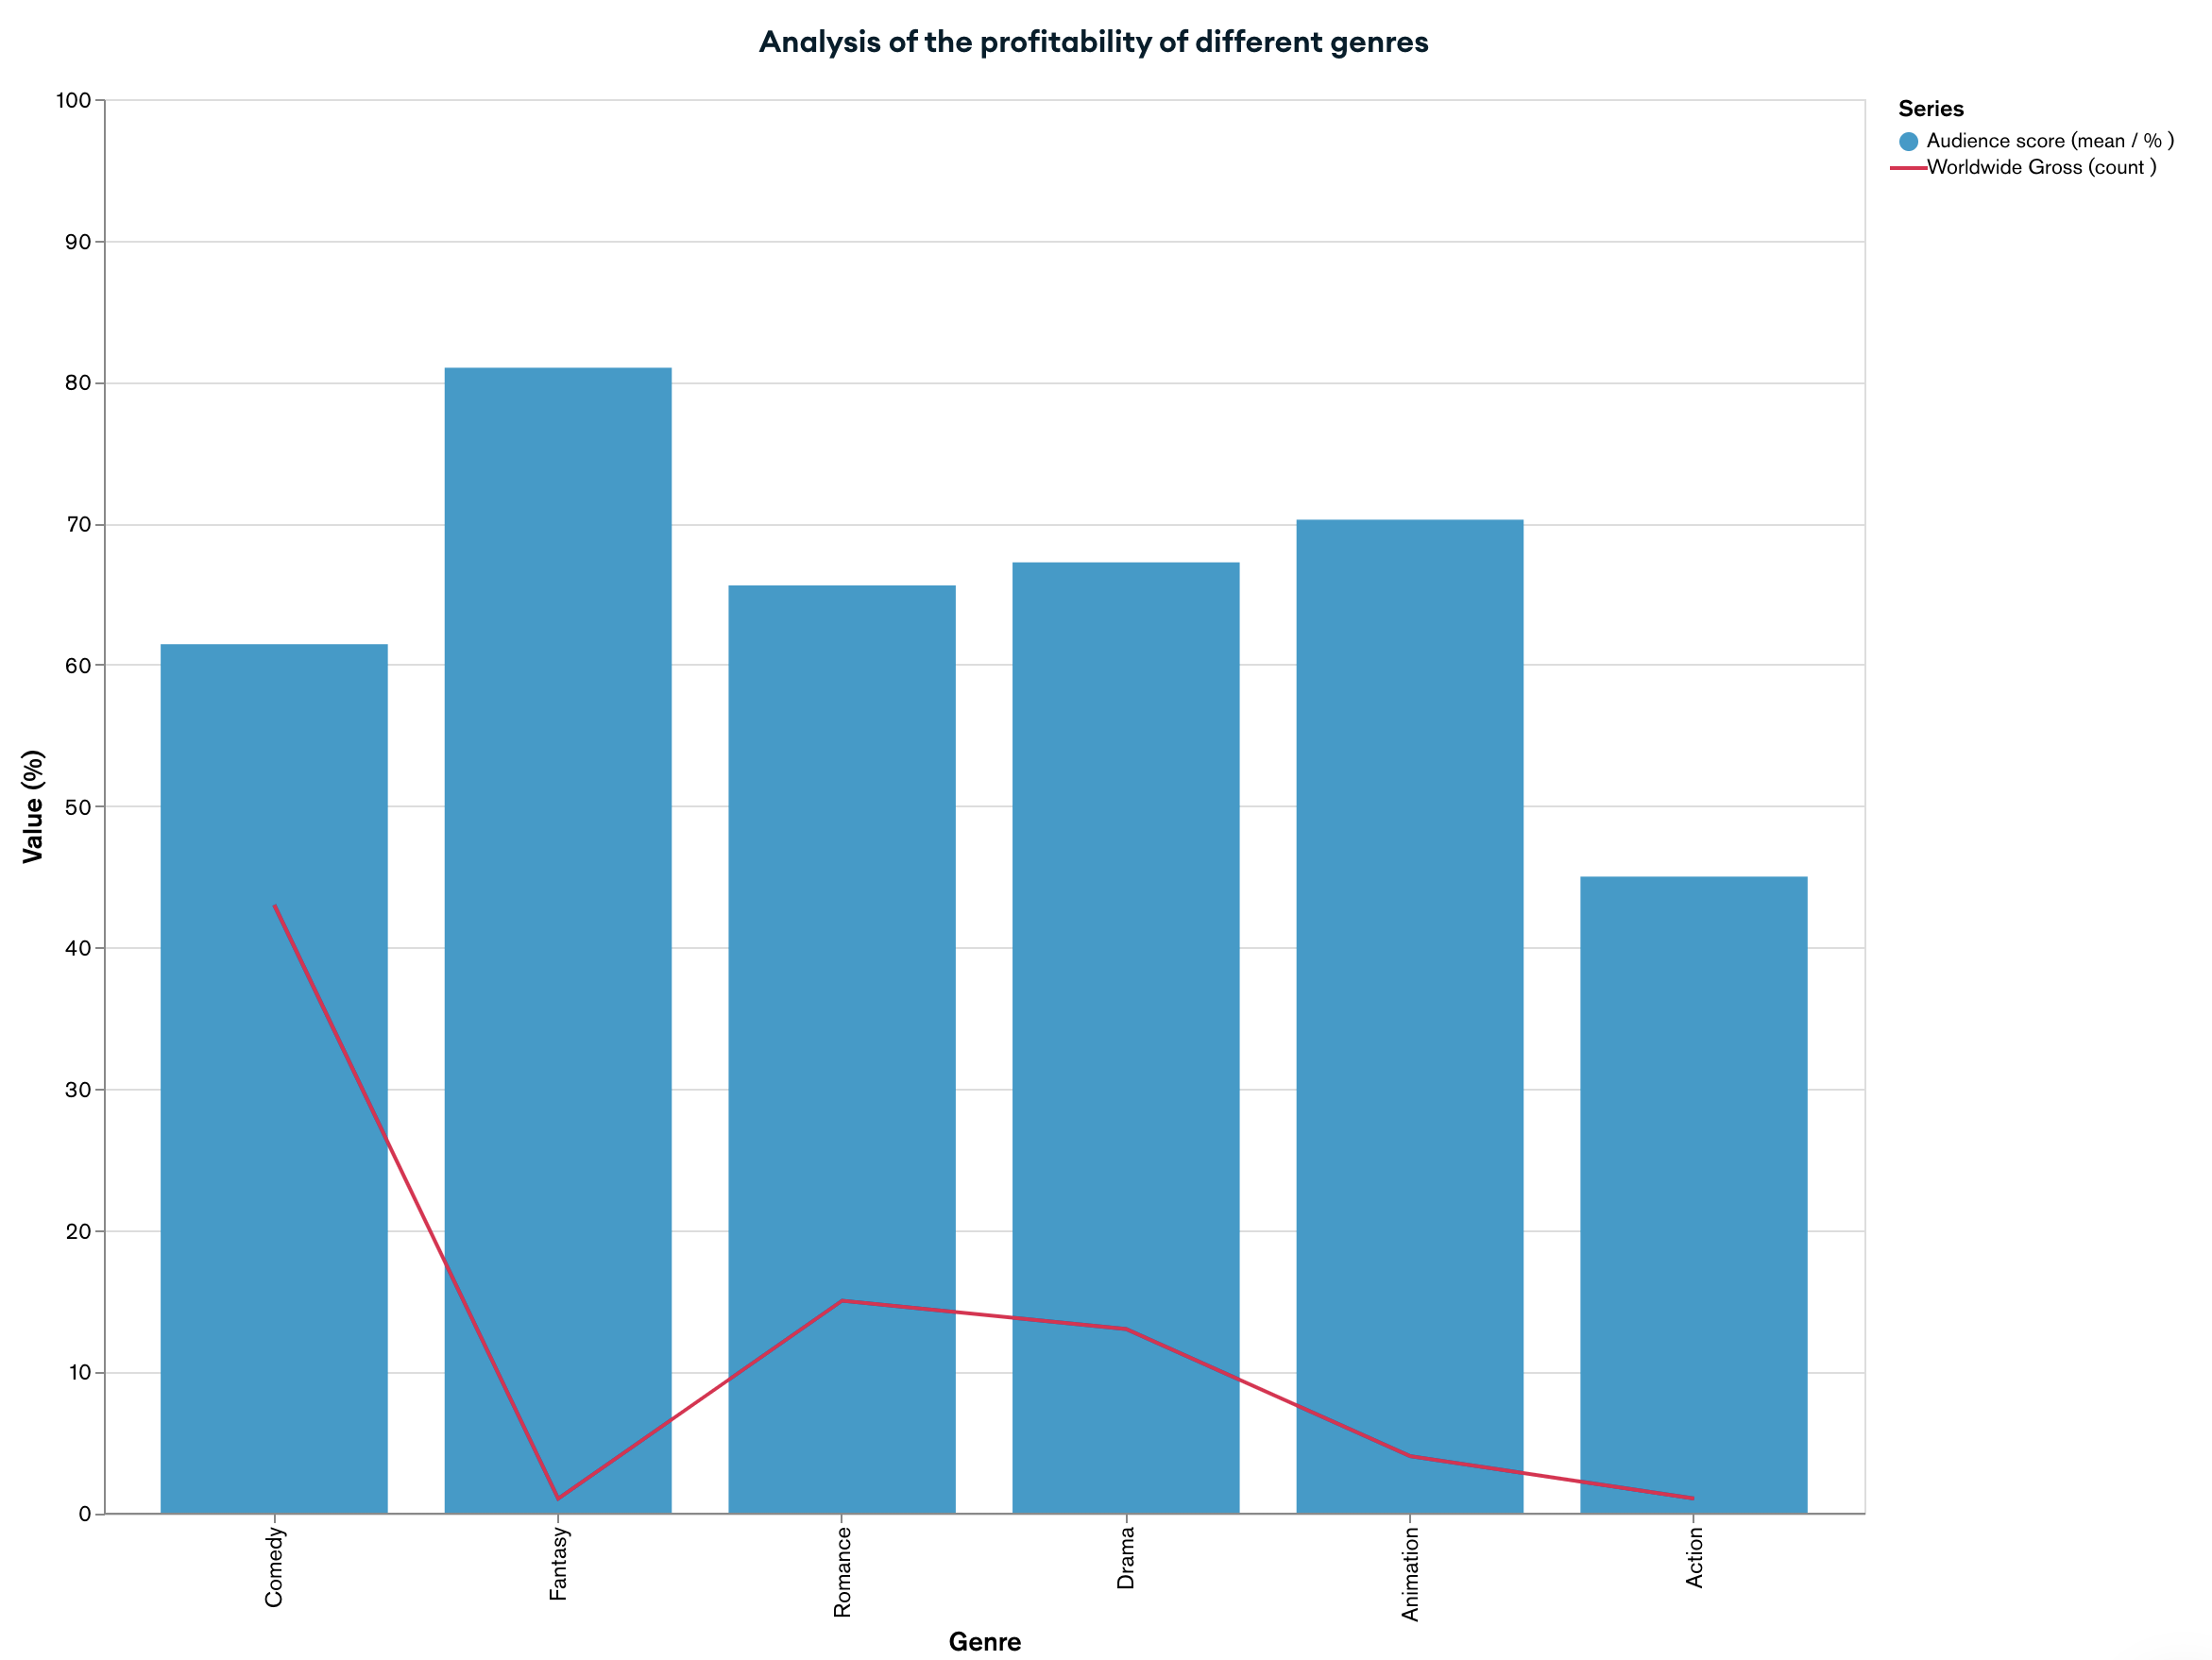

**Conclusion:*

Despite the high audience ratings for the Fantasy and Animation genres, it is noteworthy that profitability in these genres remains minimal.

While the audience may show a strong preference for Fantasy and Animation films, profitability is influenced by various factors such as production costs, marketing expenses, distribution strategies, and box office performance. It is possible that the production and marketing costs associated with Fantasy and Animation films outweigh the revenue generated from ticket sales and other sources.

Could this be one of the reasons why AI is increasingly likely to be used to create these movies?

### Analysis of audience and critic ratings.

This analysis will help us to understand the relationship between audience and critic scores. 
1. These scores can be compared and assess whether there is a significant discrepancy between them. 
2. In addition, we could investigate how these scores relate to other factors such as genre. 

This would provide us with information on how audience and critical opinions can influence the success of a film.

#### Comparation between the audience and critic scores

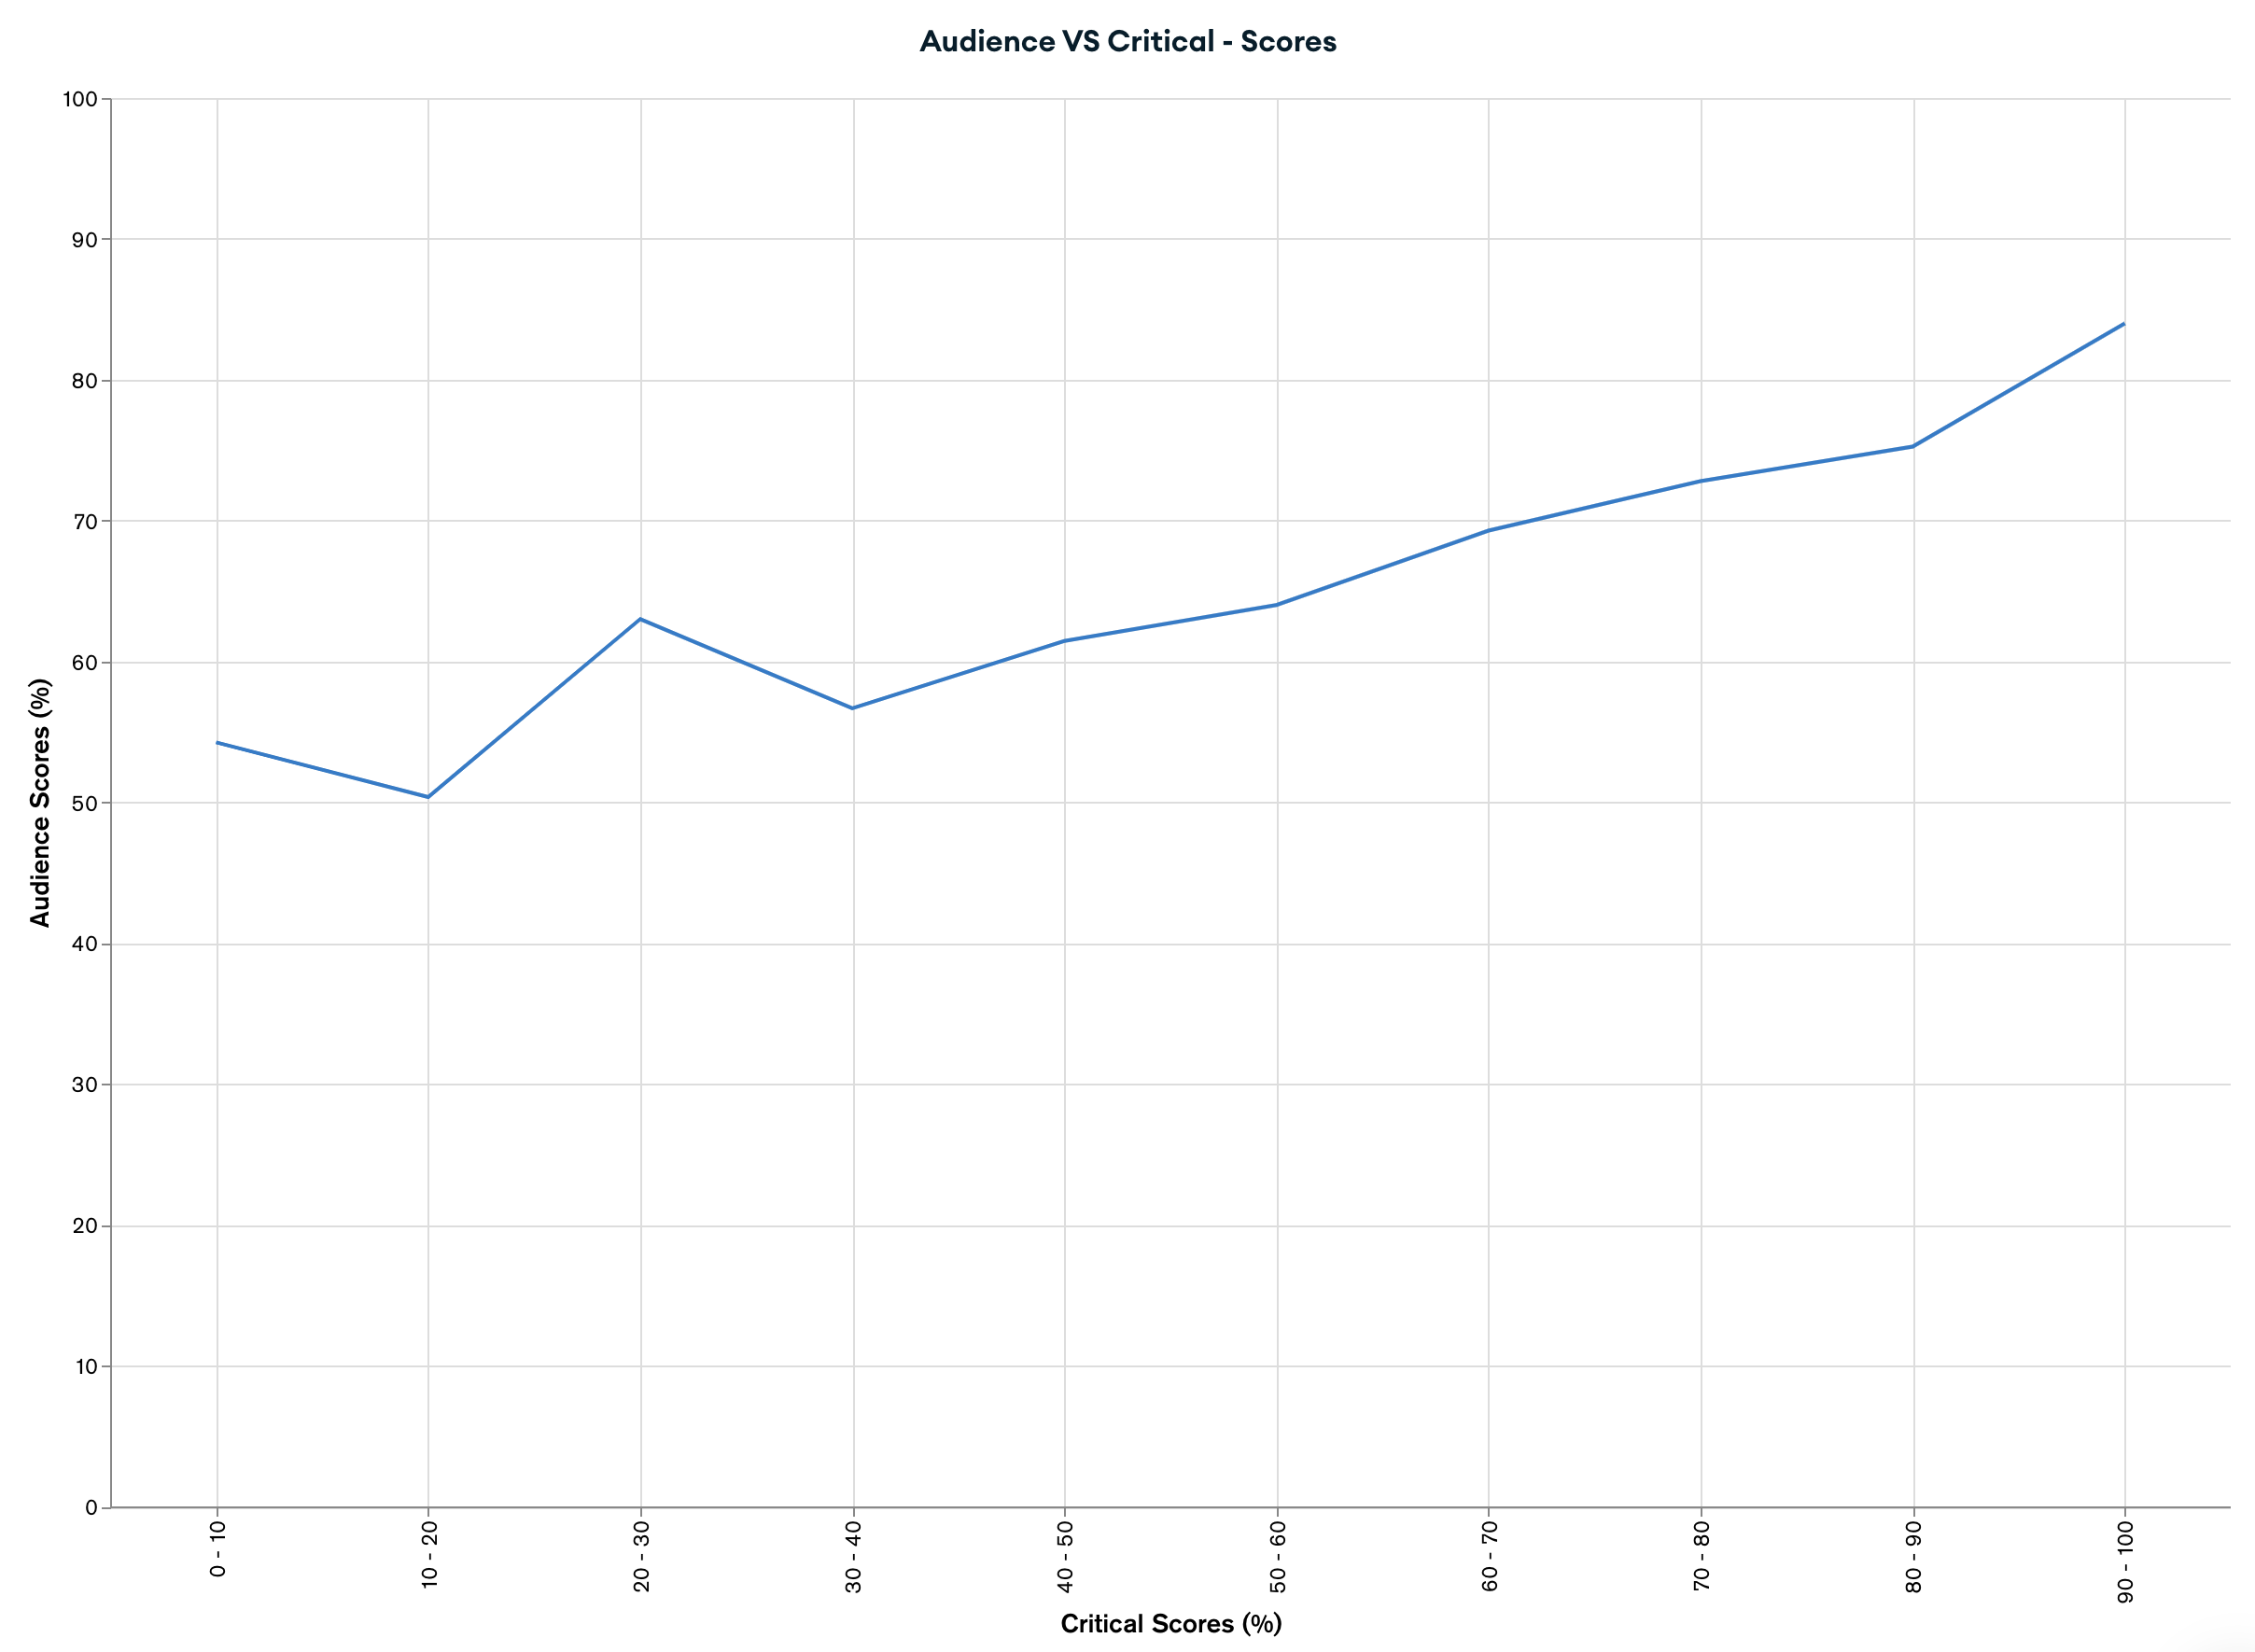

**Conclusion:**

When analyzing the relationship between the audience score and the critical (professional) score, it appears that there is a positive linear trend, suggesting a certain consistency between the opinions of users and professionals.

#### How these scores relate to other factors such as genre, major studio or year of release?

##### Factor 1: Genre

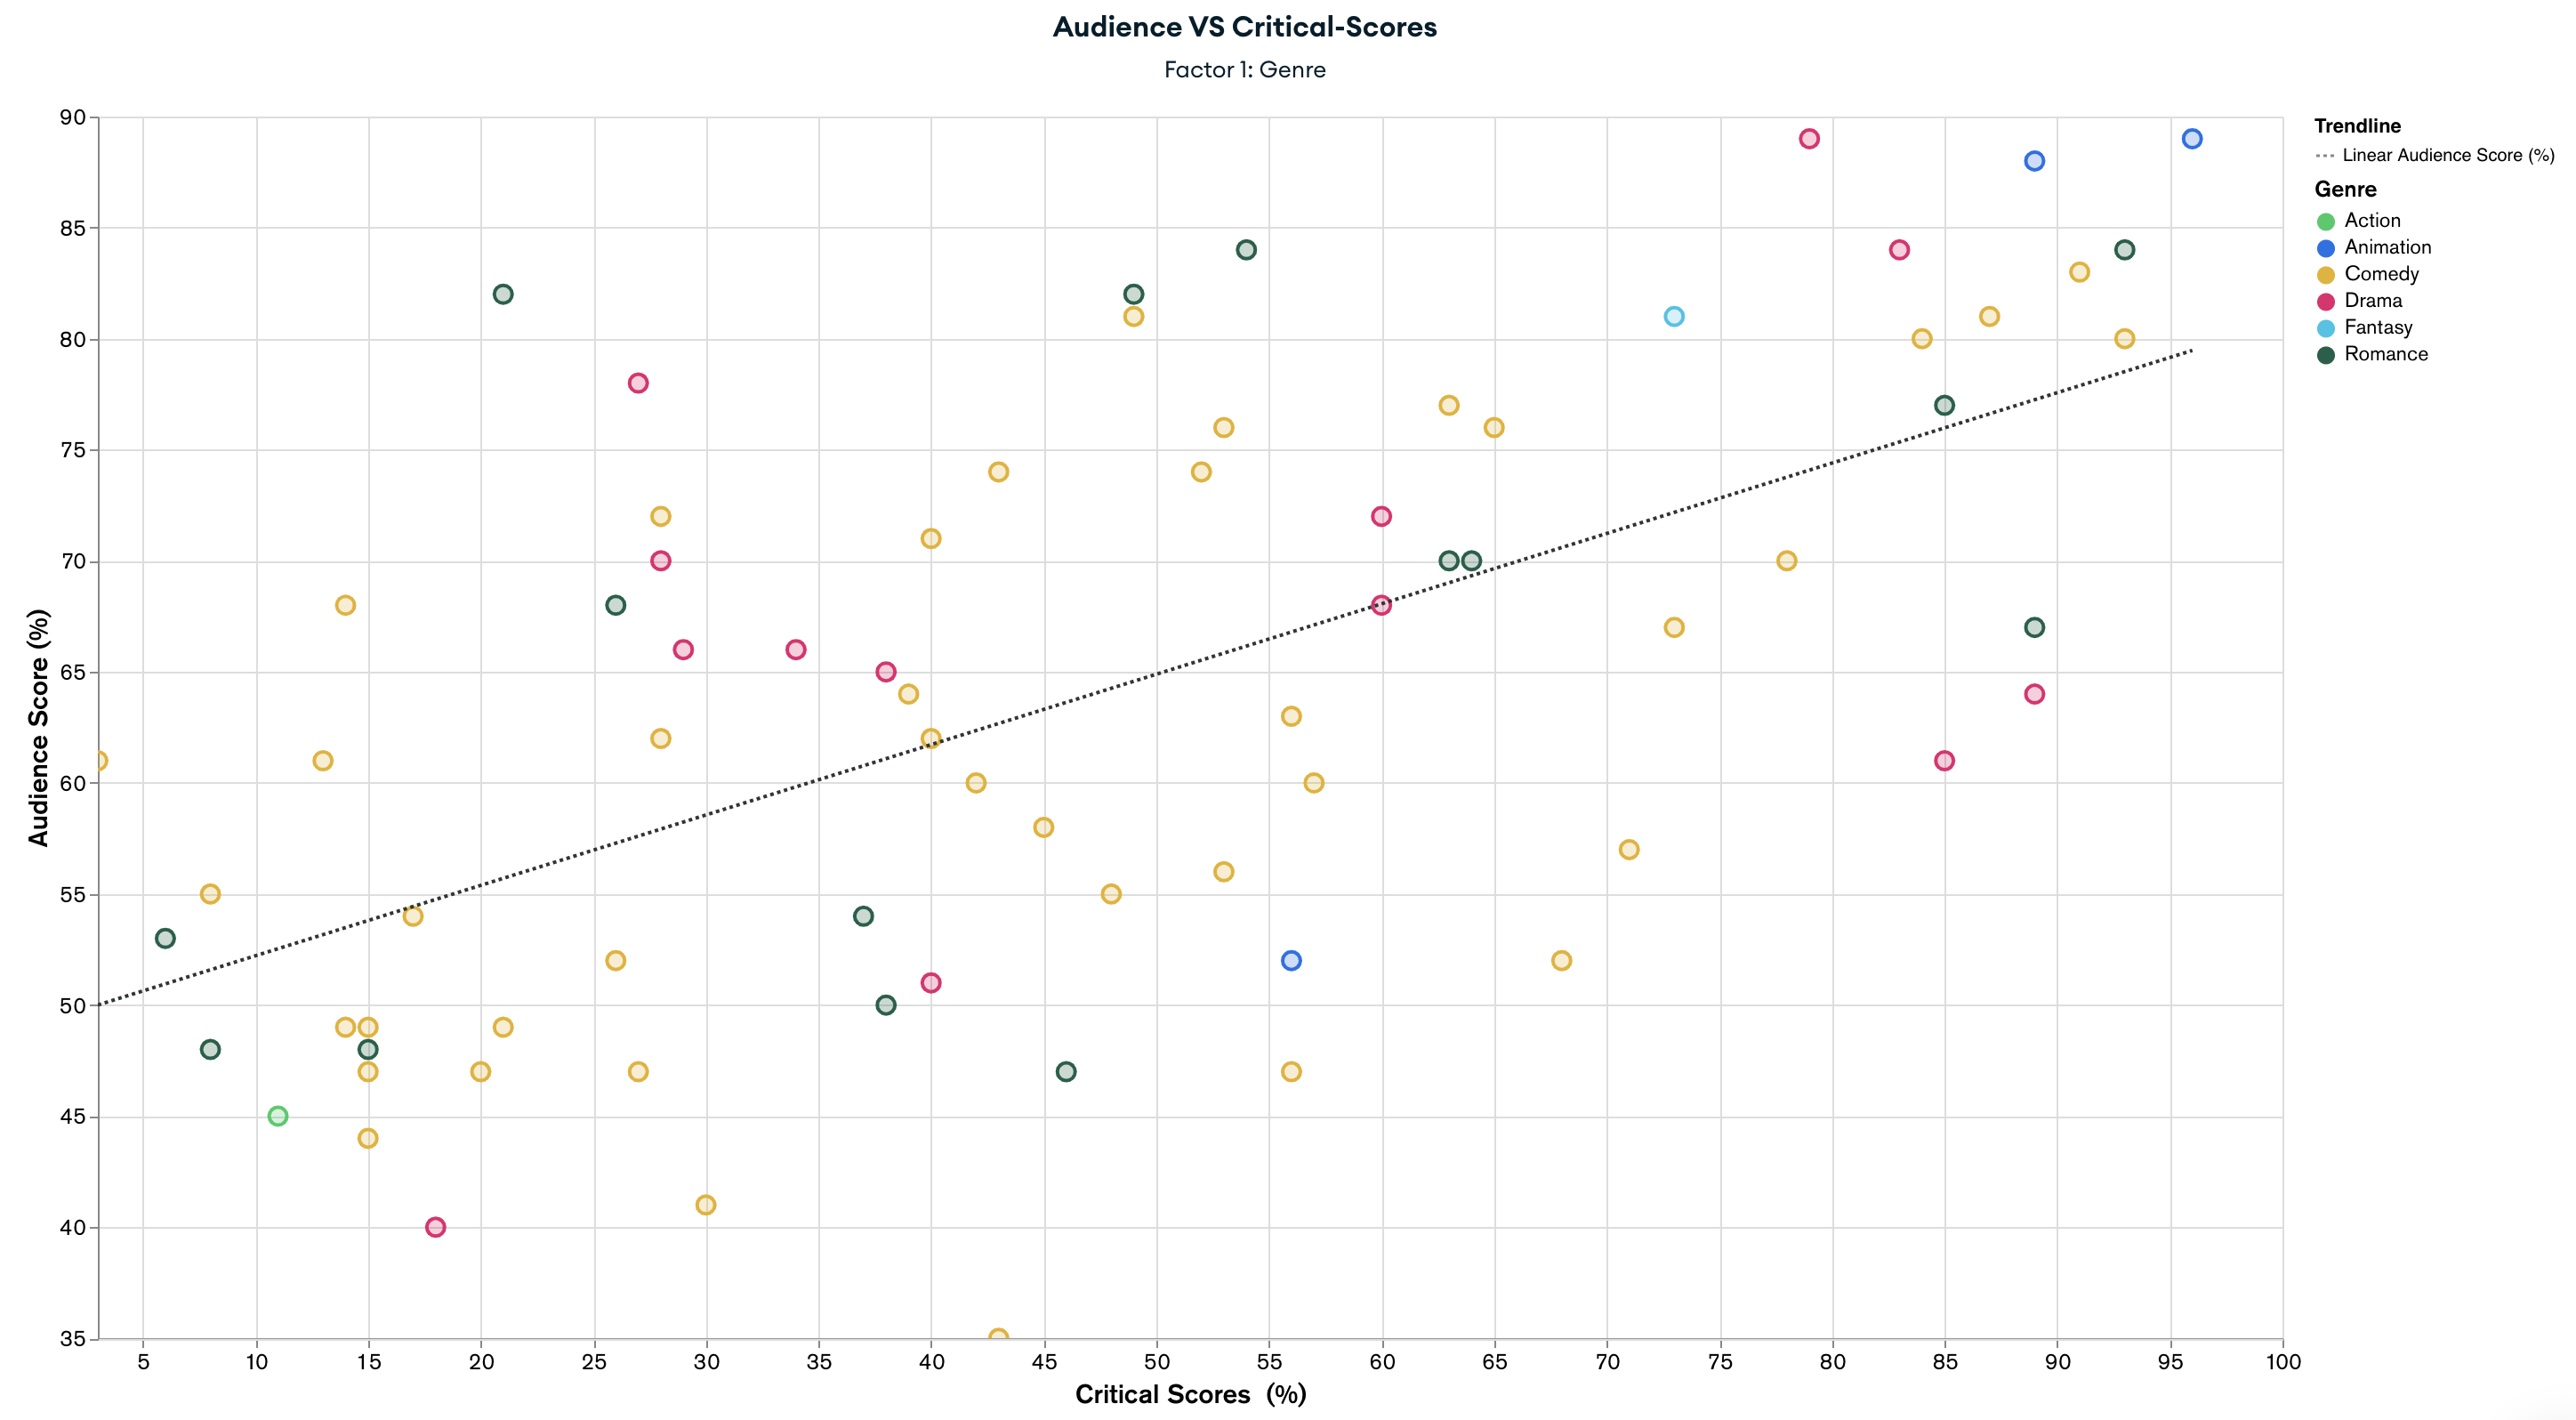

**Conclusion:**

When analyzing audience and critic ratings based on the genre of the film, it is observed that the positive linear trend between the two variables is maintained, even though there is a significant dispersion in the data.

The persistence of the positive linear trend implies that, across various film genres, there is a general consistency between the opinions of the audience and professional critics. This indicates that, regardless of the genre, films that receive high ratings from the audience tend to also receive positive reviews from critics, and vice versa.

Should you wish to view and edit these graphs, please feel free to visit the following website:

https://charts.mongodb.com/charts-project-0-hzsnk/public/dashboards/699f97f6-5db2-438c-ac83-0ad2d16cbcd4